In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from Preprocessing import FeatureExtract, filter_data

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# read the data

#df = pd.read_csv('SaYoPillow.csv')
y = np.loadtxt("goodmood.txt")
y1 = np.loadtxt("stressed.txt")
y2 = np.loadtxt("calm.txt")

In [3]:
# renaming

#df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
#             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
df = pd.DataFrame.from_dict(FeatureExtract(y, plot=0))
df1 = pd.DataFrame.from_dict(FeatureExtract(y1, plot=0))
df2 = pd.DataFrame.from_dict(FeatureExtract(y2, plot=0))

In [4]:
#y = df["stress_level"]
#X = df.drop(["stress_level"], axis= 1)
X = pd.concat([df, df1, df2]).values
y = pd.concat([pd.Series([0] * len(df)), pd.Series([1] * len(df1)), pd.Series([2] * len(df2))]).values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [56]:
#y.head()

In [57]:
#X.head()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [6]:
y_hat= knn_model.predict(X_train)
print(classification_report(y_train, y_hat,target_names=['Goodmood', 'Stressed', 'Calm']))

              precision    recall  f1-score   support

    Goodmood       0.87      0.91      0.89        85
    Stressed       0.91      0.86      0.88        93
        Calm       0.99      1.00      0.99        92

    accuracy                           0.92       270
   macro avg       0.92      0.92      0.92       270
weighted avg       0.92      0.92      0.92       270



In [7]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9222222222222223

In [8]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
print(classification_report(y_test, y_pred,target_names=['Goodmood', 'Stressed', 'Calm']))

              precision    recall  f1-score   support

    Goodmood       0.94      0.86      0.90        35
    Stressed       0.83      0.93      0.88        27
        Calm       1.00      1.00      1.00        28

    accuracy                           0.92        90
   macro avg       0.92      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90



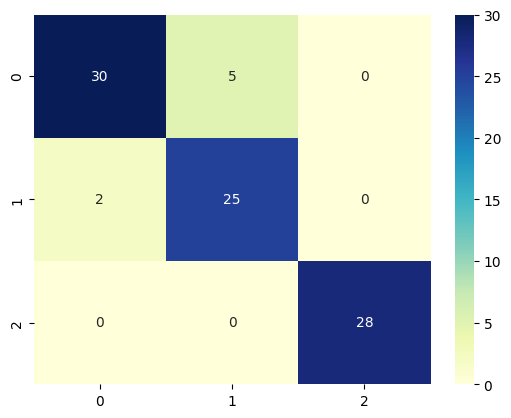

In [10]:
mat = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')